We will try to predict if stock market will go up or down tomorrow

In [1]:
# Imports part 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  precision_score
import pandas as pd

In [2]:
# Download price history
nepse = pd.read_csv("NEPSE.csv")

In [3]:
nepse

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NEPSE,2024-01-30,2105.87,2128.11,2105.46,2119.61,0.70 %,"5,544,217,593.12"
1,NEPSE,2024-01-29,2097.48,2114.79,2097.23,2104.72,0.48 %,"4,566,522,230.82"
2,NEPSE,2024-01-28,2084.64,2098.14,2075.37,2094.46,0.49 %,"3,833,776,580.76"
3,NEPSE,2024-01-25,2088.49,2096.75,2072.78,2084.09,-0.18 %,"3,764,505,450.98"
4,NEPSE,2024-01-24,2098.97,2120.46,2083.45,2088.04,-0.48 %,"3,897,022,598.98"
...,...,...,...,...,...,...,...,...
1133,NEPSE,2019-02-05,1143.58,1149.40,1143.39,1147.10,0.00 %,"221,967,008.00"
1134,NEPSE,2019-02-04,1152.98,1155.08,1144.27,1144.27,0.00 %,"322,760,992.00"
1135,NEPSE,2019-02-03,1160.57,1161.22,1152.16,1153.06,0.00 %,"321,743,008.00"
1136,NEPSE,2019-01-31,1162.34,1163.86,1160.26,1161.63,0.00 %,"268,244,992.00"


The price of nepse for a day

In [4]:
nepse.index

RangeIndex(start=0, stop=1138, step=1)

In [7]:
del nepse['Symbol']

Cleaning    

In [9]:
del nepse['Percent Change']

In [10]:
nepse["Date"] = pd.to_datetime(nepse["Date"])

In [11]:
nepse = nepse.set_index("Date")

In [12]:
nepse.index

DatetimeIndex(['2024-01-30', '2024-01-29', '2024-01-28', '2024-01-25',
               '2024-01-24', '2024-01-23', '2024-01-22', '2024-01-21',
               '2024-01-18', '2024-01-17',
               ...
               '2019-02-12', '2019-02-11', '2019-02-10', '2019-02-07',
               '2019-02-06', '2019-02-05', '2019-02-04', '2019-02-03',
               '2019-01-31', '2019-01-30'],
              dtype='datetime64[ns]', name='Date', length=1138, freq=None)

In [18]:
nepse = nepse.sort_index()

In [19]:
nepse

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2019-01-30,1160.53,1163.27,1159.35,1160.59,"190,572,992.00",NaN,0
2019-01-31,1162.34,1163.86,1160.26,1161.63,"268,244,992.00",1160.59,0
2019-02-03,1160.57,1161.22,1152.16,1153.06,"321,743,008.00",1161.63,1
2019-02-04,1152.98,1155.08,1144.27,1144.27,"322,760,992.00",1153.06,1
2019-02-05,1143.58,1149.40,1143.39,1147.10,"221,967,008.00",1144.27,0
...,...,...,...,...,...,...,...
2024-01-24,2098.97,2120.46,2083.45,2088.04,"3,897,022,598.98",2098.29,1
2024-01-25,2088.49,2096.75,2072.78,2084.09,"3,764,505,450.98",2088.04,1
2024-01-28,2084.64,2098.14,2075.37,2094.46,"3,833,776,580.76",2084.09,0


<Axes: xlabel='Date'>

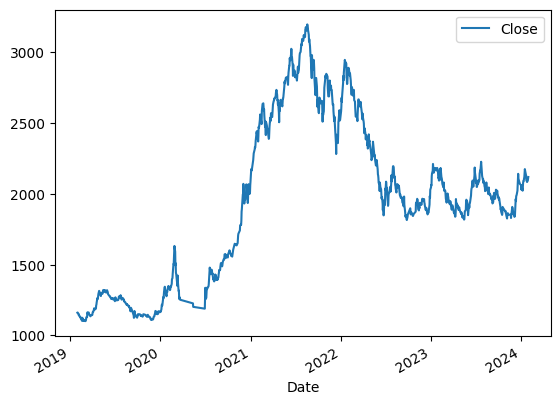

In [20]:
# plot the closing price against the index
nepse.plot.line(y="Close", use_index=True)

In [21]:
#Setup target 
nepse["Tomorrow"] = nepse["Close"].shift(-1)

In [22]:
nepse

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2019-01-30,1160.53,1163.27,1159.35,1160.59,"190,572,992.00",1161.63,0
2019-01-31,1162.34,1163.86,1160.26,1161.63,"268,244,992.00",1153.06,0
2019-02-03,1160.57,1161.22,1152.16,1153.06,"321,743,008.00",1144.27,1
2019-02-04,1152.98,1155.08,1144.27,1144.27,"322,760,992.00",1147.10,1
2019-02-05,1143.58,1149.40,1143.39,1147.10,"221,967,008.00",1139.72,0
...,...,...,...,...,...,...,...
2024-01-24,2098.97,2120.46,2083.45,2088.04,"3,897,022,598.98",2084.09,1
2024-01-25,2088.49,2096.75,2072.78,2084.09,"3,764,505,450.98",2094.46,1
2024-01-28,2084.64,2098.14,2075.37,2094.46,"3,833,776,580.76",2104.72,0


In [23]:
nepse["Target"] = (nepse["Tomorrow"] > nepse["Close"]).astype(int)

In [28]:
nepse['Volume'] = nepse['Volume'].str.replace(',', '').astype(float)

In [29]:
nepse

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2019-01-30,1160.53,1163.27,1159.35,1160.59,1.905730e+08,1161.63,1
2019-01-31,1162.34,1163.86,1160.26,1161.63,2.682450e+08,1153.06,0
2019-02-03,1160.57,1161.22,1152.16,1153.06,3.217430e+08,1144.27,0
2019-02-04,1152.98,1155.08,1144.27,1144.27,3.227610e+08,1147.10,1
2019-02-05,1143.58,1149.40,1143.39,1147.10,2.219670e+08,1139.72,0
...,...,...,...,...,...,...,...
2024-01-24,2098.97,2120.46,2083.45,2088.04,3.897023e+09,2084.09,0
2024-01-25,2088.49,2096.75,2072.78,2084.09,3.764505e+09,2094.46,1
2024-01-28,2084.64,2098.14,2075.37,2094.46,3.833777e+09,2104.72,1


Training initial model 

In [26]:
#RFC
model = RandomForestClassifier(n_estimators=200, min_samples_split=100,random_state=1)

In [30]:
#Train test data
train = nepse.iloc[:-100]
test = nepse.iloc[-100:]

predictors = ["Open", "High", "Low", "Close", "Volume"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [31]:
preds = model.predict(test[predictors])

In [32]:
import pandas as pd
preds = pd.Series(preds,index=test.index)

In [33]:
precision_score(test["Target"],preds)

0.5116279069767442

In [34]:
combined = pd.concat([test["Target"],preds],axis=1)

<Axes: xlabel='Date'>

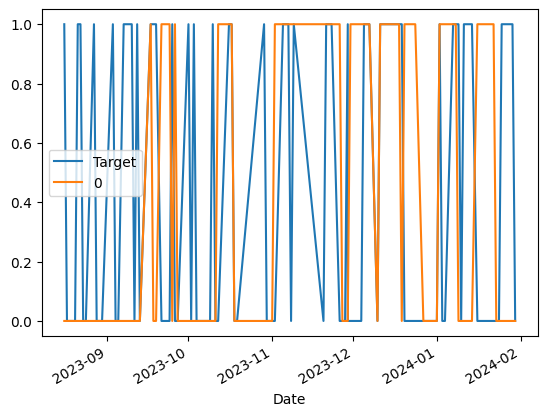

In [35]:
combined.plot()

In [44]:
#Building a backtesting system 
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"],preds], axis=1)
    return combined

In [45]:
def backtest(data, model, predictors, start = 250 , step = 25):
    all_predictions = []
    
    for i in range (start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train,test,predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [46]:
predictions = backtest(nepse, model, predictors)

In [47]:
predictions["Predictions"].value_counts()

Predictions
1    467
0    421
Name: count, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5117773019271948

In [49]:
predictions["Target"].value_counts()/predictions.shape[0]

Target
0    0.509009
1    0.490991
Name: count, dtype: float64

In [50]:
horizons = [2,5,60]
new_predictors = []

for horizon in horizons:
    rolling_averages = nepse.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    nepse[ratio_column] = nepse["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    nepse[trend_column] = nepse.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [51]:
nepse = nepse.dropna(subset=nepse.columns[nepse.columns != "Tomorrow"])

In [52]:
nepse

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60
Date,,,,,,,,,,,,,
2019-04-30,1310.65,1316.53,1296.07,1298.60,9.130180e+08,1294.39,0,0.995512,0.0,0.999718,3.0,1.116084,34.0
2019-05-02,1298.80,1300.43,1282.95,1294.39,5.731450e+08,1277.68,0,0.998376,0.0,0.994166,2.0,1.110354,33.0
2019-05-05,1293.71,1293.71,1276.73,1277.68,6.286410e+08,1299.41,1,0.993503,0.0,0.983513,1.0,1.094071,33.0
2019-05-06,1278.00,1299.41,1270.06,1299.41,6.195650e+08,1301.28,1,1.008432,1.0,1.002571,1.0,1.110220,34.0
2019-05-07,1298.35,1311.18,1295.73,1301.28,6.998490e+08,1297.60,0,1.000719,2.0,1.005415,2.0,1.109382,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-24,2098.97,2120.46,2083.45,2088.04,3.897023e+09,2084.09,0,0.997552,0.0,0.987625,0.0,1.061477,27.0
2024-01-25,2088.49,2096.75,2072.78,2084.09,3.764505e+09,2094.46,1,0.999053,0.0,0.992491,0.0,1.057592,27.0
2024-01-28,2084.64,2098.14,2075.37,2094.46,3.833777e+09,2104.72,1,1.002482,1.0,1.000834,1.0,1.060674,28.0


In [53]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [54]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [57]:
def backtest(data, model, predictors, start=250, step=25):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [58]:
predictions = backtest(nepse, model, new_predictors)

In [59]:
predictions["Predictions"].value_counts()


Predictions
0.0    647
1.0    181
Name: count, dtype: int64

In [60]:
precision_score(predictions["Target"], predictions["Predictions"])


0.6022099447513812

In [61]:
predictions["Target"].value_counts() / predictions.shape[0]


Target
0    0.513285
1    0.486715
Name: count, dtype: float64

In [62]:
predictions

,Target,Predictions
Date,,
2020-08-09,1,0.0
2020-08-10,0,1.0
2020-08-11,1,0.0
2020-08-12,0,0.0
2020-08-13,0,0.0
...,...,...
2024-01-24,0,0.0
2024-01-25,1,0.0
2024-01-28,1,0.0


In [63]:
# Noq we will try to predict the price of nepse using Deep learning

In [64]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
